In [22]:
import sys
sys.path.insert(0,'/home/milanov/Bachelorarbeit/mge/')

import numpy as np
import matplotlib.pyplot as plt
import mge_fit_sectors as mge
from scipy import interpolate
from scipy import constants as cs
from astropy import units as un
%matplotlib inline

In [10]:
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)

In [11]:
r_3d0=r_3d[0]
m10=m1[0]
m20=m2[0]
x0=x[0]
y0=y[0]
z0=z[0]


r_3d=r_3d[1:]
m1=m1[1:]
m2=m2[1:]
x=x[1:]
y=y[1:]
z=z[1:]

In [12]:
r0=0.01
step=15
end=100
stepsize=((np.log10(end)-np.log10(r0))/step)
R=np.zeros(step)
r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]
binwidth=r_a-r_i
r_error=binwidth/2


In [20]:
M = np.zeros(step)
rho=np.zeros(step)
Z=np.zeros(step)
for n in range(step):
    inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) #r_3d wird verwendet! creates boolean arrays woth true values if star is in bin distance
    M[n]=np.sum(m1[inbin])+np.sum(m2[inbin]) #mass array with both masses of binary system
    rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates density of bin
    R[n]=np.mean(r_3d[inbin]) #calculates mean distance of bin
    Z[n]=np.mean(z[inbin])
    
#extrabin am anfang
M_extra=np.sum(m1[r_3d<r0])+np.sum(m2[r_3d<r0])
rho_extra=M_extra/(r0**2*np.pi)
R_extra=np.mean(r_3d[r_3d<r0])
Z_extra=np.mean(z[z<r0])
#einfuegen in bereits angefertigte arrays an erster Stelle
M_final=np.insert(M,0,M_extra)
rho_final=np.insert(rho,0,rho_extra)
R_final=np.insert(R,0,R_extra)
Z_final=np.insert(Z,0,Z_extra)

rho_relerror=-2*r_error/R_final[1:]
rho_error=rho_relerror*rho_final[1:]

s = interpolate.InterpolatedUnivariateSpline(np.log(R_final[:]), np.log(rho_final[:]))
R_new=np.logspace(-3,2,1000)
rho_int=np.exp(s(np.log(R_new)))

In [37]:
theta=np.arccos(Z_final/R_final)
mge.mge_fit_sectors(R_final,theta,rho_final,1)


Nonzero Gaussians: 8
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration:  1   chi2: 2.011  Nonzero: 8
Nonzero Gaussians: 7
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration:  1   chi2: 1.876  Nonzero: 7
Nonzero Gaussians: 7
Eliminating not useful Gaussians...
############################################
 Computation time: 0.15 seconds
  Total Iterations:  0
 Nonzero Gaussians:  7
  Unused Gaussians:  8
 Sectors used in the fit:  16
 Total number of points fitted:  16
 Chi2: 1.876 
 STDEV: 0.3217 
 MEANABSDEV: 0.1944 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      8428.23     0.0488014      0.050000
      2967.83       1.45717      0.052199
      9354.79       3.51385      0.050000
      324.387       3.57464      0.088355
      5533.21       8.61704      0.067050
      1296.64       12.1115      0.050074
      4.68841       35.2862      0.079972
+++++++++++

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


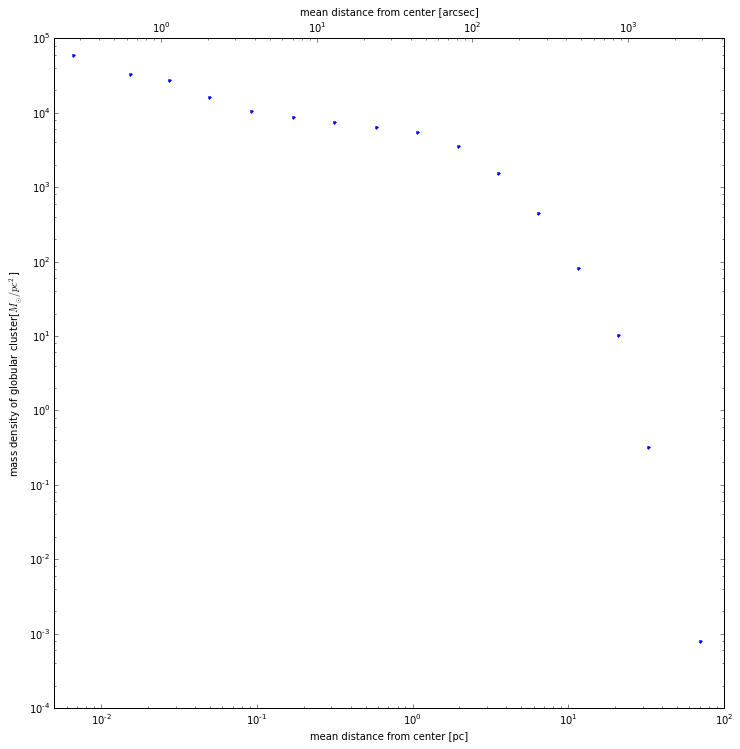

In [16]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.loglog(R_final,rho_final,'.')
ax1.set_xlim(0.005,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('mass density of globular cluster[$M_\odot/pc^2$]')

ax2.set_xlim((0.005/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')
#ax2.set_title('log 3d density profile') #open question: how to have extra xlabel and title

plt.show()
#fig.savefig('Plots/log 3d density profile with ' +str(step+1)+' steps')

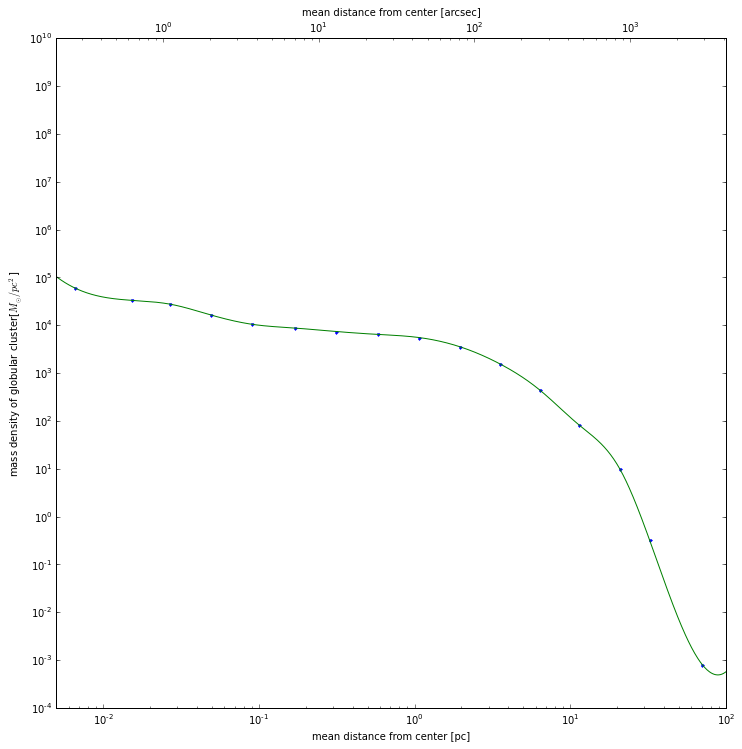

In [14]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.loglog(R_final,rho_final,'.')
ax1.loglog(R_new,rho_int)
ax1.set_xlim(0.005,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('mass density of globular cluster[$M_\odot/pc^2$]')



ax2.set_xlim((0.005/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

fig.savefig('3d density profile numerical fit without imbh')

plt.show()
